<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/05_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.2 Bucket model

Soil moisture reservoir can be thought of a bucket with leak. Rainfall is like adding water into the bucket, actual evapotranspiration is like water going into the atmosphere, leak in the bucket is like recharge to groundwater.

$\frac{dS}{dt} = Rain - AET - Leak $

$Leak$ can be modelled as a faction of available SM ($S$),

$\frac{dS}{dt} = Rain - AET - \alpha S $

Above equation is discretized and solved numerically by using explict scheme. 

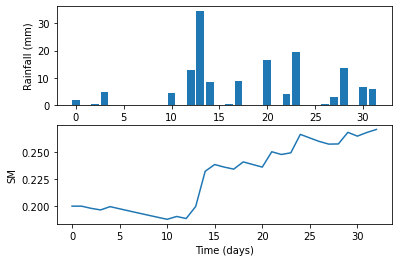

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rain = np.array([2,0,0.5,5,0,0,0,0,0,0,4.5,0,13,34.5,8.5,0,0.5,9,0,0,16.5,0,4,
                 19.5,0,0,0.5,3,13.5,0,6.5,6])
pet = np.array([1.8,4.5,4.8,3.5,4.7,4.8,4.6,5.2,2.5,4.8,5.0,4.8,4.0,4.5,4.5,4.6,
                4.5,3.8,4.0,4.6,4.4,4.3,4.1,4.6,4.0,4.7,3.6,3.6,3.2,4.5,3.2,3.1])

rain = rain/1000 # convert from mm to m
pet = pet/1000 # convert from mm to m

n = len(rain)
sm = np.empty(n+1)
sm[0] = 0.2 # initial condition
Z = 1.0 # depth of soil profile [m]
r = 0.01 # percentage of water going as recharge to groundwater
evap_0	= 0.25
evap_1 = 0.35
thetas = 0.5 # saturated soil moisture
for i in range(n):
  smi = (sm[i]-evap_0)/(evap_1 - evap_0)
  if smi<0: smi=0
  if smi>1: smi=1
  aet = smi*pet[i]
  sm[i+1] = (1-r)*sm[i] + (rain[i] - aet)/Z
  if sm[i+1]>thetas: sm[i+1] = thetas
  #print(i)

plt.subplot(211)
plt.bar(range(n),rain*1000)
plt.ylabel("Rainfall (mm)")

plt.subplot(212)
plt.plot(sm)
plt.xlabel("Time (days)")
plt.ylabel("SM")
plt.show()